## Import Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# display all column when looking at dataframes
pd.set_option("display.max.columns", None)

In [9]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

raw_eqk.head()

raw_eqk.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
place         object
type          object
dtype: object

In [17]:
raw_eqk.type.unique()

eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag > 6.5)]

eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake
22968,2014-03-16 21:16:29.600,-19.9807,-70.7022,20.00,6.7,usc000ndnj,"64km WNW of Iquique, Chile",earthquake
24887,2014-03-10 05:18:13.400,40.8287,-125.1338,16.60,6.8,nc72182046,"78km WNW of Ferndale, California",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,usb000pr89,"70km SW of Panguna, Papua New Guinea",earthquake
31670,2014-04-19 01:04:03.820,-6.6558,155.0869,29.00,6.6,usb000pqwe,"57km SW of Panguna, Papua New Guinea",earthquake


In [19]:
eqk = gpd.GeoDataFrame(eqk, # data for geo-DataFrame
                                geometry = gpd.points_from_xy(eqk.longitude, # create a geometry column
                                                              eqk.latitude),
                                crs = 'EPSG:4326' # specify CRS
                               )

eqk.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

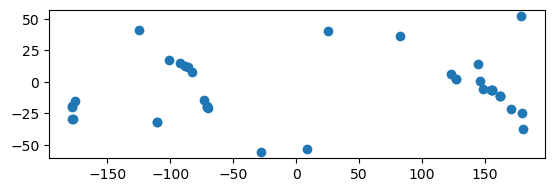

In [20]:
eqk.plot()

In [21]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


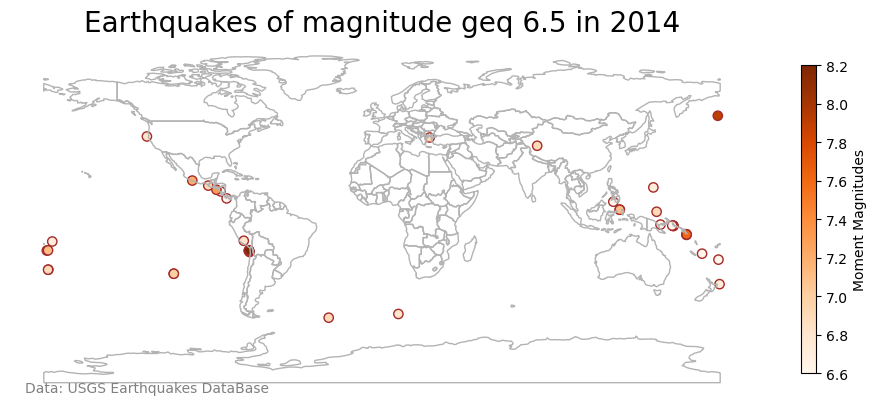

In [69]:
fig, ax = plt.subplots(figsize=(12,8))

ax.axis('off')

eqk.plot(ax=ax,
        column = 'mag',
              legend = True,
        markersize = 45,
        cmap = 'Oranges',
         edgecolor = 'brown',
         legend_kwds={'shrink':.5,
                                    'label': 'Moment Magnitudes', 
                                    'orientation': 'vertical'
                                    }
        )
worldmap.plot(ax=ax,
             color = 'none',
             edgecolor = '0.7')
ax.set_title('Earthquakes of magnitude geq 6.5 in 2014',  fontsize=20)
plt.text(-190, -95,'Data: USGS Earthquakes DataBase', color = 'grey')

plt.show()